## LOAD DATASET


In [1]:
import pandas as pd
data = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final).csv')

#  add new column and set value to category of label column, produk = 0, layanan pelanggan= 1, pengiriman = 2
cat_code = {'Produk': 0, 'Layanan Pelanggan': 1, 'Pengiriman': 2}
data['category_id'] = data['label'].map(cat_code)
data


,text,label,category_id
0,Cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii,Pengiriman,2
1,Fast response recommended seller,Layanan Pelanggan,1
2,Barang bagus tapi analog kiri sama kanan kalo ...,Produk,0
3,keren gan Produknya buat main games,Produk,0
4,mantap gan!!!!!.Barang bagus juga,Produk,0
...,...,...,...
1019,gak nyangaka keren banget jamnya hi hi,Produk,0
1020,Pengiriman sangat cepat. Terima kasih,Pengiriman,2
1021,Pesan + bayar tgl. 07 Sep 18 jam 2 siang. Bara...,Layanan Pelanggan,1
1022,Packingnya keren rapi dan aman pakai bubble wr...,Layanan Pelanggan,1


### EDA


In [2]:
data.groupby('label').size()

label
Layanan Pelanggan    329
Pengiriman           172
Produk               523
dtype: int64

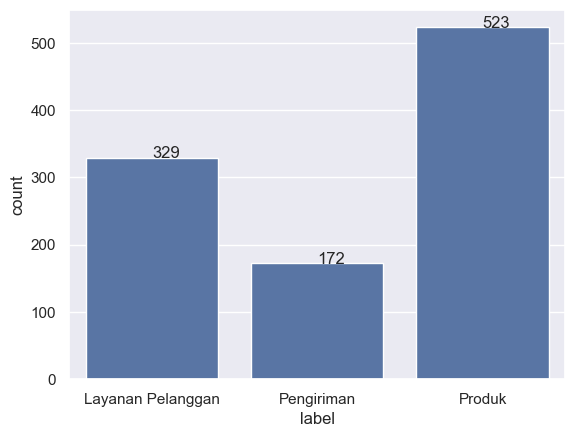

In [3]:
# do EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# add exact number on top of bar
datagroup = data.groupby('label').size()
for index, value in enumerate(datagroup):
    plt.text(index, value, str(value))
ax = sns.countplot(x="label", data=data, order=datagroup.index)
plt.show()



In [4]:
data.groupby('label').size()

label
Layanan Pelanggan    329
Pengiriman           172
Produk               523
dtype: int64

In [13]:
data.head()

,text,label,category_id
0,Cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii,Pengiriman,2
1,Fast response recommended seller,Layanan Pelanggan,1
2,Barang bagus tapi analog kiri sama kanan kalo ...,Produk,0
3,keren gan Produknya buat main games,Produk,0
4,mantap gan!!!!!.Barang bagus juga,Produk,0


# PREPROCESSING


## Cleaning


In [5]:
import preprocessing as pre

data_clean = data.text.apply(pre.preprocess)
data_clean.head()

0                cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii
1                     fast response recommended seller
2    barang bagus analog kiri kanan kalo setting ja...
3                          keren gan produk main games
4                              mantap gan barang bagus
Name: text, dtype: object

In [14]:
data['text_clean'] = data_clean
data.head()

,text,label,category_id,text_clean
0,Cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii,Pengiriman,2,cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii
1,Fast response recommended seller,Layanan Pelanggan,1,fast response recommended seller
2,Barang bagus tapi analog kiri sama kanan kalo ...,Produk,0,barang bagus analog kiri kanan kalo setting ja...
3,keren gan Produknya buat main games,Produk,0,keren gan produk main games
4,mantap gan!!!!!.Barang bagus juga,Produk,0,mantap gan barang bagus


In [17]:
# save to csv
data.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean.csv', index=False)

In [18]:
# load scv again
data = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean.csv')
data.head()

,text,label,category_id,text_clean
0,Cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii,Pengiriman,2,cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii
1,Fast response recommended seller,Layanan Pelanggan,1,fast response recommended seller
2,Barang bagus tapi analog kiri sama kanan kalo ...,Produk,0,barang bagus analog kiri kanan kalo setting ja...
3,keren gan Produknya buat main games,Produk,0,keren gan produk main games
4,mantap gan!!!!!.Barang bagus juga,Produk,0,mantap gan barang bagus


After doing preprocess, i will split the data into train set and test set. After that, i will save the data into different csv file. So ican use it later with seamlessly without run again the preprocess from the beginning.


## Splitting

1. Ratio 80 : 20


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Let's say your DataFrame is df and you want to stratify by the 'label' column
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(data, data['label']):
    df_train = data.loc[train_index]
    df_test = data.loc[test_index]

In [24]:
df_train.head()

,text,label,category_id,text_clean
335,barang sudah saya terima thanks,Layanan Pelanggan,1,barang terima thanks
481,Fast ResponseFriendly Recommended Seller,Layanan Pelanggan,1,fast responsefriendly recommended seller
657,Seller fast respon Produk sudah diterima buat ...,Layanan Pelanggan,1,seller fast respon produk terima stok thanks
205,mantap gan. laen kali pesen langsung,Layanan Pelanggan,1,mantap gan laen kali sen langsung
671,Fast respon dan barangnya mulus sip,Layanan Pelanggan,1,fast respon barang mulus sip


In [23]:

df_test['label'].value_counts()


label
Produk               105
Layanan Pelanggan     66
Pengiriman            34
Name: count, dtype: int64

In [25]:
# save to csv
df_train.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Train.csv', index=False)

df_test.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Test.csv', index=False)


In [26]:
# load scv again
df_train = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Train.csv')

df_test = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Test.csv')



In [28]:
df_test

,text,label,category_id,text_clean
0,Proses dan Pengirimannya cepat banget! Packing...,Pengiriman,2,proses kirim cepat banget packing rapi barang ...
1,sangat memuaskan sesuaia dengan yang di post,Produk,0,muas sesuaia post
2,Keren jamnya terima kasih ya,Produk,0,keren jam terima kasih ya
3,Pengiriman cepattt sayaukaa sekaliih 😍,Pengiriman,2,kirim cepattt sayaukaa sekaliih
4,Cakep nih gak bakal kecewa recommend bngt,Layanan Pelanggan,1,cakep nih gak bakal kecewa recommend bngt
...,...,...,...,...
200,Barang murah tapi gak murahan,Produk,0,barang murah gak murah
201,Thanks gan barang sudah sampai packing rapi be...,Layanan Pelanggan,1,thanks gan barang packing rapi fungsi baik
202,Keren jam nya thanks flash sale,Produk,0,keren jam nya thanks flash sale
203,analog kiri gak berfungsi gan.,Produk,0,analog kiri gak fungsi gan


## TFIDF


In [29]:
import tfidf as tfidf
import pickle


In [33]:
# 80 : 20
tfidf_model_80 = tfidf.TFIDF(df_train.text_clean) # init tfidf model with train data
df_tfidf_train_80 = df_train
df_tfidf_train_80['tfidf'] = df_train.text.apply(tfidf_model_80.transform) # get tfidf value for each word in train data
df_tfidf_test_80 = df_test
df_tfidf_test_80['tfidf'] = df_test.text.apply(tfidf_model_80.transform) # get tfidf value for each word in test data

# save to pickle
with open('../../Dataset/TFIDF Model - 80.pkl', 'wb') as f:
    pickle.dump(tfidf_model_80, f, pickle.HIGHEST_PROTOCOL)

with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Train - TFIDF.pkl', 'wb') as f:
    pickle.dump(df_tfidf_train_80, f, pickle.HIGHEST_PROTOCOL)

with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Clean - 80 - Test - TFIDF.pkl', 'wb') as f:
    pickle.dump(df_tfidf_test_80, f, pickle.HIGHEST_PROTOCOL)


In [34]:
len(tfidf_model_80.word_list)

1085